In [2]:
import csv
import sys
#sys.path.insert(0, "../runit/")
sys.path.insert(0,"../python/")
from MC_Plots import style
from Sigma_study import energy

import numpy as np

import collections
import random
import matplotlib.pyplot as plt
from matplotlib import pyplot as pp
from scipy.stats import chisquare
from scipy.optimize import curve_fit
from sympy.solvers import solve
from sympy import Symbol
import os
import re
import fnmatch
import pandas as pd
import matplotlib.font_manager

import lmfit

from tempfile import TemporaryFile


plt.rc('text', usetex=True)


from lmfit import Model

In [2]:
ps = style(figure_width = 9,spine_color= 'Black')

In [4]:
en= energy(energy= 1500,edep_max=250)

In [ ]:
#calculate the total weight of the ref MC
#only do this the first time you run the notebook
#and after it's not necessary 


# en_ref= energy(energy= en.energy,edep_max=en.edep_max,Type='ref')

# tw=en_ref.total_weight(10000000,famsize=100)
# np.save('twrefMC%i'%en_ref.energy,tw)

In [4]:
#load files and calculate total weights
arr_tot_weight_vrt=[]
arr_tot_weight_nonvrt=[]

ns=np.array([10000,100000,1000000,10000000])#no use in showing the smal simulations 
for i in ns:
    arr_tot_weight_nonvrt.append(en.total_weight(i,vrt='None',famsize=2)[0][1])
    #we use fam number 2 same as other plots
    
    arr_tot_weight_vrt.append(en.total_weight(i)[0])
    #arr_sigma_vrt.append(en.get_sigma(i))
    
tot_weight_vrt = np.array(arr_tot_weight_vrt)[:,0]#pick 1 tot weight to cal relative differance    
arr_tot_weight_nonvrt = np.array(arr_tot_weight_nonvrt)
arr_sigma_vrt=np.sqrt(np.var(arr_tot_weight_vrt,axis=1)) / np.mean(arr_tot_weight_vrt,axis=1)
#error is calculated by the Var of the whole fam


1
2
1
2
3
4
5
6
7
8
9
10
1
2
1
2
3
4
5
6
7
8
9
10
1
2
1
2
3
4
5
6
7
8
9
10
1
2
1
2
3
4
5
6
7
8
9
10


In [5]:
#prtint values 
print(tot_weight_vrt)
print(arr_sigma_vrt)
print(arr_tot_weight_nonvrt)

[  0.35214021   3.18922671  31.62852196 314.12662313]
[0.07669648 0.01719353 0.00666463 0.00140043]
[  1.   2.  42. 306.]


In [6]:
#load ref MC
ref=np.load('twrefMC%i.npy'%en.energy)
Nbg_ref=np.array(ns)*np.mean(ref[1])

In [7]:
#calculate relative differance 
VRT_diff= ((tot_weight_vrt.flatten()-Nbg_ref)/Nbg_ref)
NONVRT_diff= ((arr_tot_weight_nonvrt.flatten()-Nbg_ref)/Nbg_ref)


In [11]:
print(VRT_diff)
print(NONVRT_diff)

[0.12275632 0.01684623 0.00843703 0.00155461]
[ 2.18837863 -0.36232427  0.33911902 -0.02435614]


In [8]:
#calculate error on points 
error_vrt=arr_sigma_vrt
error_nonvrt=(np.sqrt(arr_tot_weight_nonvrt).flatten())/Nbg_ref

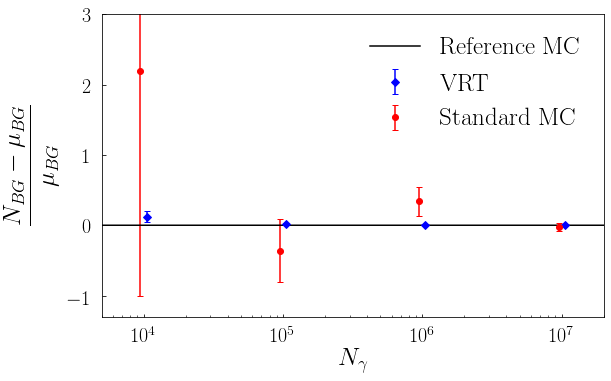

In [9]:
#method with lowwer limmit on error bar
ps.latexify()
nb=100
fig , ax=plt.subplots(1,1)


x= np.linspace(0,20000000,num=nb*100)
ax.plot(x,np.zeros(len(x)),color='Black',label='Reference MC')

#separate the points
x_vrt= ns*1.05
x_nonvrt= ns*0.95

#plot the points with error bar
ax.errorbar(x_vrt,VRT_diff, yerr=error_vrt, fmt='D',label='VRT',color='Blue')
ax.errorbar(x_nonvrt,NONVRT_diff, yerr=error_nonvrt, fmt='o',color="Red",label='Standard MC')



ax.set_xscale('log')
ax.legend(loc='upper right',frameon=False)
ax.set_xlabel(r'$N_{\gamma}$')

ax.set_ylabel( r'\begin{eqnarray*}' + \
      r'\frac{N_{BG} - \mu_{BG}} {\mu_{BG} } '+ \
      r'\end{eqnarray*}')
ax.set_ylim(-1.3,3)
ax.set_xlim(5000,20000000)

ax.tick_params(direction='in', which='both')
ax.tick_params(axis='both', which='major', pad=10)

ps.format_axes(ax)
plt.savefig('val:totalweight_error.pdf', bbox_inches = "tight")


plt.show()
